In [1662]:
import matplotlib.pyplot as plt
import numpy as np
import tools
import importlib
from scipy.optimize import curve_fit
import sys
import math
importlib.reload(tools)
import re

In [1663]:
importlib.reload(tools)
eps_rho=0.8
eps_norm=0.8
eps_action=eps_norm
rho=3.745091
norm=1
norm_action=norm
size_local=5
neigh=1

file="profile4dt0c5to_64x10.dat"
file_top="/home/planck/workspace/fractional/Smooth/tony/"+file
file_act=file_top


top_density,sizes=tools.read_top(file_top)
#act_density,sizes=tools.read_top(file_act)

density_2d_top,sizes_big,index_smal=tools.projection_2d(top_density,sizes)
#density_2d_act,sizes_big,index_smal=tools.projection_2d(act_density,sizes)


inst, a_inst, frac, a_frac, t_frac, t_inst, total=tools.find_inst_2d(density_2d_top,
                                                                     density_2d_top,sizes_big,norm,2*norm,neigh)



In [1664]:
for i in range(0,len(frac)):
    if frac[i][2][4]>0.01:
        jj=i
        print(jj)
        #print(np.sqrt(np.diag(frac[i][3])))
tools.plot_dens_2d(file_top,density_2d_top,sizes_big,[frac[jj]],[])
popt=frac[jj][2]
print(popt)
#tools.plot_dens_2d(file_top,density_2d_top,sizes_big,t_frac)
#tools.plot_dens_2d(file_act,density_2d_act,sizes_big,t_frac)

4
[31.497019566890376, 31.54841104162267, 4.168799120291136, -4.267646014348833, 0.011826895160683392, 78.95683520871486]


In [1665]:
frac[jj][2]

[31.497019566890376,
 31.54841104162267,
 4.168799120291136,
 -4.267646014348833,
 0.011826895160683392,
 78.95683520871486]

In [1666]:
def inst_plot(position,maxima_x,maxima_y,rho,norm):
    return(norm-1/rho*np.sqrt((position[0]-maxima_x)**2 +
                    (position[1]-maxima_y)**2))

In [1667]:
#def inst_plot(position,maxima_x,maxima_y,rho,norm):
#    return(norm/(2*np.pi)*(rho**2/((position[0]-maxima_x)**2 +
#                    (position[1]-maxima_y)**2+rho**2)**2))

In [1668]:
data_plot=np.zeros((sizes_big[0],sizes_big[1]))
for i in range(0,sizes_big[0]):
    for j in range(0,sizes_big[1]):
        data_plot[i,j]=inst_plot([i,j],popt[0],popt[1],popt[2],popt[3])

In [1669]:
data_plot=np.exp(data_plot)
#data_plot_1d=data_plot.sum(axis=1)

density_2d_top=density_2d_top
#density_1d=density_2d_top.prod(axis=1)

In [1670]:
#data_plot=np.exp(data_plot)
data_plot_1d=data_plot[:,frac[jj][1]]

#density_2d_top=np.log(abs(density_2d_top))
density_1d=density_2d_top[:,frac[jj][1]]

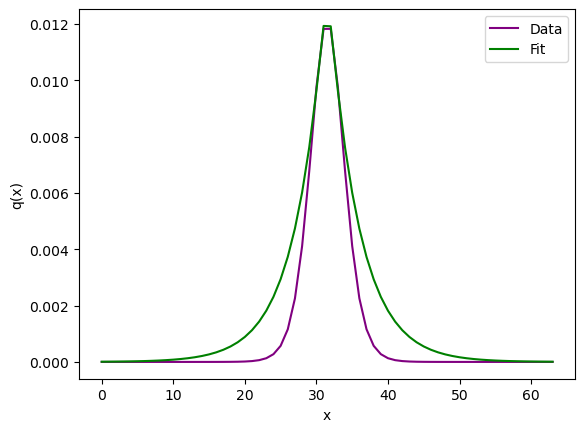

In [1671]:


plt.xlabel("x")
plt.ylabel("q(x)")

plt.plot(density_1d, color="purple", label="Data")
plt.plot(data_plot_1d, color="green", 
         label="Fit")
plt.legend(loc="upper right")

#plt.savefig("../../fractional/Smooth/tony/"+"Smooth_128x8_fit_exp.png", dpi=150)
plt.savefig("../../fractional/Smooth/tony/"+"Smooth_64x10_fit_exp.png", dpi=150)
#plt.xlim(30,40)
#plt.ylim(-15,0)
plt.show()


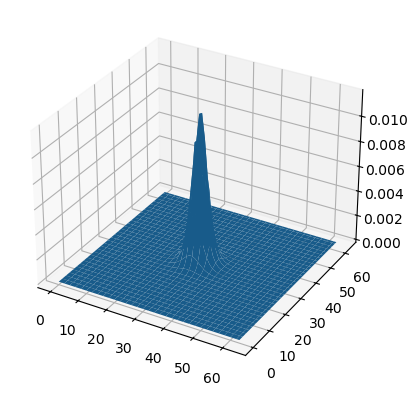

In [1672]:
points=np.zeros((sizes[2],sizes[3]))

X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,density_2d_top)

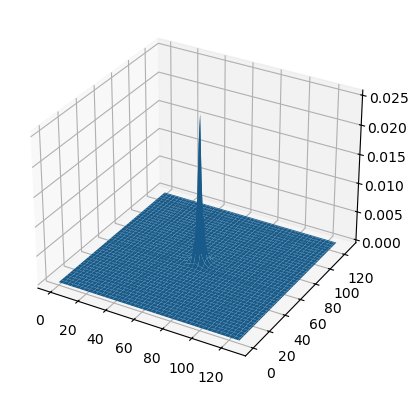

In [1641]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot)